# Выпускная квалификационная работа по курсу «Инженер данных (Data engineer Pro)» 

## Выполнила Власенкова Анна Андреевна

Задача: необходимо на основе данных с ftp.zakupki.gov.ru научиться определять группу, к которой относится контракт с кодом ОКПД-2 41, 42, 43, 71.1.

Группы могут быть следующими:

    1. Строительно-монтажные работы (СМР)
    2. Проектно-изыскательские работы (ПИР)
    3. Строительный надзор
    4. Подключение коммуникаций
    5. Прочее.

По ОКПД-2 контракты в общем случае должны разделяться так:
Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных)
Проектно-изыскательские работы (ПИР) - 41.1, 71.1
Подключение коммуникаций - 43.22
Строительный надзор – четкой группы нет.


Проблема: Далеко не всегда контракты указываются с нужным кодом, поэтому есть проблема как такие контракты "отловить" и определить в нужную группу.

Поэтому задача предполагает классификацию контрактов на основе объекта закупки, который сформулирован естественным языком. 
На основе этого на входе данные о контрактах. На выходе необходимо получить группу для каждого контракта.

Иногда контракт может относиться одновременно в несколько групп.

## Разведочный анализ и предобработка данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'D:\ВКР\проект\fz\fz.csv', sep=',', on_bad_lines='skip', header = None, encoding='utf-8', nrows=10000000)

C:\Users\anvla\AppData\Local\Temp\ipykernel_22856\2232484144.py:1: DtypeWarning: Columns (6,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\ВКР\проект\fz\fz.csv', sep=',', on_bad_lines='skip', header = None, encoding='utf-8', nrows=10000000)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1,1010101008321000006,211010101008301010100100100246820244,7707049388,"КРАСНОДАРСКИЙ ФИЛИАЛ ПАО \РОСТЕЛЕКОМ\""""",<НЕ ОПРЕДЕЛЕНО>,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,...,2022-04-18,\N,<НЕ ОПРЕДЕЛЕНО>,\N,173380.50,0.00,"Изменение условий контракта, заключенного с ед...",<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
1,2,1010101008321000006,211010101008301010100100100246820244,7707049388,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО \РОСТЕЛЕКОМ\""""",78,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,...,2022-04-18,\N,<НЕ ОПРЕДЕЛЕНО>,\N,173380.50,0.00,"Изменение условий контракта, заключенного с ед...",<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
2,3,1010101008321000007,211010101008301010100100100236820244,105076166,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МАН ...,01,0101010083,"МО МВД РОССИИ \КОШЕХАБЛЬСКИЙ\""""",Республика Адыгея (Адыгея),18803020840390049244,...,2022-04-19,\N,<НЕ ОПРЕДЕЛЕНО>,\N,221778.00,\N,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,Услуги по операциям с недвижимым имуществом,68.2
3,4,1010501691421000144,211010501691401050100101960012640323,6630008994,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \КРУС...,66,0105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,...,2022-09-27,\N,<НЕ ОПРЕДЕЛЕНО>,281119.60,281119.60,0.00,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Оборудование компьютерное, электронное и оптич...",26.4
4,6,1010501691421000148,211010501691401050100101940012640323,7743763319,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \МЕДИ...,77,0105016914,ГУ-РО ФОНДА СОЦИАЛЬНОГО СТРАХОВАНИЯ РОССИЙСКОЙ...,Республика Адыгея (Адыгея),39310030440139570323,...,\N,\N,<НЕ ОПРЕДЕЛЕНО>,120597.44,77785.15,0.00,<НЕ ОПРЕДЕЛЕНО>,<НЕ ОПРЕДЕЛЕНО>,"Оборудование компьютерное, электронное и оптич...",26.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 27 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       int64 
 1   1       int64 
 2   2       object
 3   3       int64 
 4   4       object
 5   5       object
 6   6       object
 7   7       object
 8   8       object
 9   9       object
 10  10      object
 11  11      object
 12  12      object
 13  13      object
 14  14      object
 15  15      object
 16  16      object
 17  17      object
 18  18      object
 19  19      object
 20  20      object
 21  21      object
 22  22      object
 23  23      object
 24  24      object
 25  25      object
 26  26      object
dtypes: int64(3), object(24)
memory usage: 2.0+ GB


In [6]:
df.describe()

,0,1,3
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.917836e+06,2.608305e+18,6.875152e+10
std,3.343914e+06,7.546709e+17,3.484893e+11
min,1.000000e+00,1.193000e+16,0.000000e+00
25%,3.110704e+06,2.141700e+18,3.662998e+09
50%,5.923932e+06,2.645305e+18,6.450028e+09
75%,8.815202e+06,3.253101e+18,7.730042e+09
max,1.167939e+07,4.920456e+18,3.168901e+14


In [7]:
df.dtypes

0      int64
1      int64
2     object
3      int64
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
dtype: object

In [8]:
df.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       1
25    1357
26    7727
dtype: int64

In [9]:
df.nunique()

0     10000000
1      7738302
2      4487568
3       513837
4       468607
5         1462
6       273719
7       147553
8         1479
9       422306
10        1794
11     3256944
12        2962
13        1472
14        2868
15        3496
16        2638
17        2461
18        3531
19        4951
20     3191689
21     4425092
22      644960
23        1060
24         353
25         304
26         625
dtype: int64

В связи с тем, что в качестве исходных данных была предложена таблица формата csv, в которой не были поименованы столбцы, выделение и именование столбцов проводилось по аналогии с шаблоном, представленным в приложении 2 Аттестационного задания.

При проведении предварительного анализа полученного датафрейма было выявлено больше двух столбцов форматы даты, которые могут иметь отношение к срокам исполнения контракта, в свзи с чем не представляется возможным точно определить продолжительность контракта.

Также было выявлено несколько столбцов, которые могут быть определены как стоимость контракта, следуя шаблону.
Так как настоящий проект носит исследовательский характер, для простоты был взят один из столбцов как подходящий для выражения значения стоимости контракта.

При реализации комерческого проекта такие детали необходимо уточнять у заказчика.

In [10]:
df_drop = df.drop([2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24], axis=1)

In [11]:
df_drop = df_drop.rename(columns={0: 'ID',
                                  1: 'CONTRACT_NUM',
                                  11: 'OBJECT_NAME',
                                  21: 'COST',
                                  25: 'DESCR',
                                  26: 'OKPD_NUM'})

In [12]:
df_drop.head()

,ID,CONTRACT_NUM,OBJECT_NAME,COST,DESCR,OKPD_NUM
0,1,1010101008321000006,<НЕ ОПРЕДЕЛЕНО>,173380.50,Услуги по операциям с недвижимым имуществом,68.2
1,2,1010101008321000006,<НЕ ОПРЕДЕЛЕНО>,173380.50,Услуги по операциям с недвижимым имуществом,68.2
2,3,1010101008321000007,<НЕ ОПРЕДЕЛЕНО>,221778.00,Услуги по операциям с недвижимым имуществом,68.2
3,4,1010501691421000144,На поставку специальных устройств для чтения «...,281119.60,"Оборудование компьютерное, электронное и оптич...",26.4
4,6,1010501691421000148,На поставку голосообразующих аппаратов для обе...,77785.15,"Оборудование компьютерное, электронное и оптич...",26.4


In [13]:
df_drop['COST'] = pd.to_numeric(df_drop['COST'], errors='coerce')
df_drop['OKPD_NUM'] = df_drop['OKPD_NUM'].astype(str)

In [14]:
df_drop.describe()

,ID,CONTRACT_NUM,COST
count,1.000000e+07,1.000000e+07,9.992734e+06
mean,5.917836e+06,2.608305e+18,1.851524e+06
std,3.343914e+06,7.546709e+17,4.772455e+07
min,1.000000e+00,1.193000e+16,-1.028089e+07
25%,3.110704e+06,2.141700e+18,4.170000e+04
50%,5.923932e+06,2.645305e+18,1.499040e+05
75%,8.815202e+06,3.253101e+18,5.282254e+05
max,1.167939e+07,4.920456e+18,5.382092e+10


In [15]:
df_drop.isna().sum()

ID                 0
CONTRACT_NUM       0
OBJECT_NAME        0
COST            7266
DESCR           1357
OKPD_NUM           0
dtype: int64

In [9]:
df_drop.to_csv(r'df_drop.csv', index=False)

In [16]:
df_drop['OKPD_NUM'].value_counts().to_dict()

{'21.2': 1040718,
 '35.1': 392808,
 '32.5': 389482,
 '35.3': 382042,
 '36.0': 282795,
 '10.5': 278959,
 '61.1': 236029,
 '10.1': 218359,
 '10.8': 197245,
 '20.5': 196988,
 '19.2': 186856,
 '10.3': 170721,
 '22.2': 158636,
 '10.7': 153483,
 '1.1': 150302,
 '42.1': 143788,
 '33.1': 139549,
 '26.2': 136053,
 '17.2': 134676,
 '43.2': 127496,
 '58.1': 127148,
 '10.6': 123071,
 '37.0': 116155,
 '32.9': 109741,
 '17.1': 106868,
 '28.2': 106845,
 '22.1': 104121,
 '68.1': 102074,
 '10.2': 91536,
 '62.0': 89920,
 '21.1': 89732,
 '86.9': 87417,
 '71.1': 86631,
 '13.9': 84287,
 '41.2': 83859,
 '25.9': 83259,
 '81.2': 82063,
 '1.2': 80688,
 '43.9': 80522,
 '14.1': 78174,
 '43.3': 76475,
 '85.4': 75764,
 '80.1': 72876,
 '31.0': 72028,
 '1.4': 71102,
 '10.4': 65814,
 '20.4': 63079,
 '68.2': 61907,
 '26.6': 60547,
 '26.5': 58623,
 '56.2': 58606,
 '20.1': 57907,
 '35.2': 57660,
 '71.2': 52996,
 '25.7': 51904,
 '53.1': 51308,
 '38.1': 50351,
 '68.3': 48231,
 '45.2': 43471,
 '85.2': 43214,
 '20.2': 42774

In [17]:
df_work = df_drop.loc[(df_drop['OKPD_NUM'].isin(['41.2', '41.1', '71.1', '43.1', '43.2', '43.3', '43.9', '42.1', '42.2', '42.9', '31.0', '23.4', '13.9', '25.9'])) & (df_drop['OBJECT_NAME'] != '<НЕ ОПРЕДЕЛЕНО>')]

In [18]:
df_work.dtypes

ID                int64
CONTRACT_NUM      int64
OBJECT_NAME      object
COST            float64
DESCR            object
OKPD_NUM         object
dtype: object

In [19]:
df_cost_all = df_work[df_work['COST'] > 0].groupby('OKPD_NUM').agg(
                                                                MAX_COST=('COST', 'max'),
                                                                MEAN_COST=('COST', 'mean'),
                                                                MIN_COST=('COST', 'min')).reset_index()

In [20]:
df_cost_all

,OKPD_NUM,MAX_COST,MEAN_COST,MIN_COST
0,13.9,5.482179e+08,4.533359e+05,10.00
1,23.4,5.910689e+07,3.338534e+05,789.60
2,25.9,5.675323e+08,5.092121e+05,54.87
3,31.0,7.997999e+08,7.319205e+05,658.00
4,41.1,5.734449e+08,3.968472e+06,103.00
5,41.2,3.573493e+10,1.647966e+07,0.01
6,42.1,2.450197e+10,2.220684e+07,296.00
7,42.2,3.998726e+09,1.039084e+07,0.01
8,42.9,7.418641e+09,1.049891e+07,1.00
9,43.1,2.016338e+09,4.137228e+06,0.01


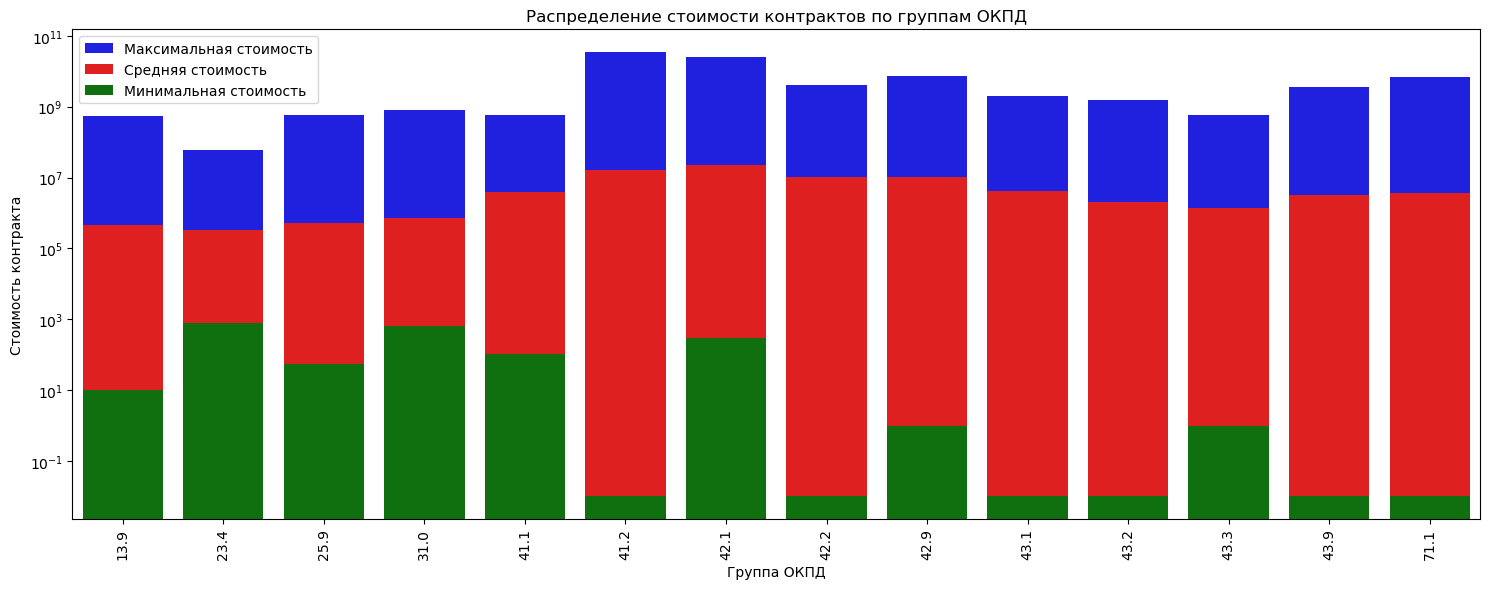

In [28]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_cost_all, x='OKPD_NUM', y='MAX_COST', color='blue', label='Максимальная стоимость')
sns.barplot(data=df_cost_all, x='OKPD_NUM', y='MEAN_COST', color='red', label='Средняя стоимость')
sns.barplot(data=df_cost_all, x='OKPD_NUM', y='MIN_COST', color='green', label='Минимальная стоимость')
plt.title('Распределение стоимости контрактов по группам ОКПД')
plt.xlabel('Группа ОКПД')
plt.ylabel('Стоимость контракта')
plt.legend()
plt.xticks(rotation=90)
plt.yscale("log")
plt.tight_layout()
plt.show()

In [26]:
df_work = df_work.drop(['CONTRACT_NUM', 'COST', 'DESCR', 'ID'], axis=1)

In [27]:
df_work['OBJECT_NAME']  = df_work['OBJECT_NAME'].astype('string')
df_work.dtypes

OBJECT_NAME    string
OKPD_NUM       object
dtype: object

In [28]:
df_work.isna().sum()

OBJECT_NAME    0
OKPD_NUM       0
dtype: int64

In [29]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896526 entries, 82 to 9999954
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OBJECT_NAME  896526 non-null  string
 1   OKPD_NUM     896526 non-null  object
dtypes: object(1), string(1)
memory usage: 20.5+ MB


In [28]:
df_work.to_csv(r'df_work.csv', index=False)

In [30]:
df_work.head()

,OBJECT_NAME,OKPD_NUM
82,Поставка металлической мебели,31.0
90,поставка офисных кресел,31.0
319,прочая закупка услуг (услуги по монтажу и пуск...,43.2
320,прочая закупка товара (стулья ученические),31.0
368,выполнение работ по текущему ремонту заполнени...,43.3
